In [1]:
import numpy as np
from os import listdir
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import resize, rotate
from skimage.util import random_noise
import tensorflow as tf
import math
import os

In [12]:
path = "normalize_test"
label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               '-', '(', ')', '+', 'alpha', 'beta', 'theta',
               'a', 'b', 'i', 'j', 'k', 'm', 'n', 't', 'x', 'y', 'z']
nof_labels = len(label_names)

In [13]:
nof_images = 0

# get number of images
labels_dict = dict()
i = 0
for label in label_names:
    files = listdir(path+"/"+label)
    nof_images += len(files)
    labels_dict[label] = i
    i += 1
print("#nof_images: ", nof_images)
print(labels_dict)

images = np.zeros((nof_images, 48, 48), dtype=np.float32)
labels = np.zeros(nof_images, dtype=np.int)

#nof_images:  11200
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '-': 10, '(': 11, ')': 12, '+': 13, 'alpha': 14, 'beta': 15, 'theta': 16, 'a': 17, 'b': 18, 'i': 19, 'j': 20, 'k': 21, 'm': 22, 'n': 23, 't': 24, 'x': 25, 'y': 26, 'z': 27}


In [14]:
i = 0
for label in label_names:
    files = listdir(path+"/"+label)
    label_no = labels_dict[label]
    
    for file in files:
        if i % 1000 == 0:
            print("At i=%d" % i)
        img = io.imread(path+"/"+label+"/"+file).astype(np.float32)
        img /= 255
               
        images[i] = img
        labels[i] = label_no

        i += 1
print("Finished")

At i=0
At i=1000
At i=2000
At i=3000
At i=4000
At i=5000
At i=6000
At i=7000
At i=8000
At i=9000
At i=10000
At i=11000
Finished


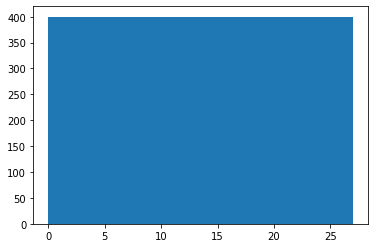

In [15]:
plt.hist(labels, nof_labels)
plt.show()

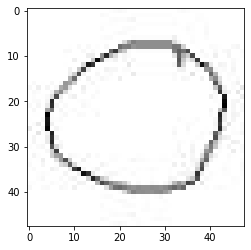

In [6]:
plt.imshow(images[500], cmap="gray")
plt.show()

In [16]:
np.save("test_images", images)
np.save("test_labels", labels)

In [8]:
train_images = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')
mean_tr = np.mean(train_images, axis=0)
std_tr = np.std(train_images, axis=0)

In [9]:
train_images-=mean_tr
train_images/=std_tr

3


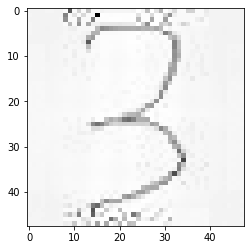

In [10]:
plt.imshow(train_images[7200], cmap="gray")
print(train_labels[7600])
plt.show()


In [11]:
np.save('mean_tr', mean_tr)
np.save('std_tr', std_tr)